<a href="https://colab.research.google.com/github/GITGENome/foie/blob/main/Etude_maladie_foie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Première Exploration du dataset

In [16]:
# Importation des modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# valeurs manquantes
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_foie = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv", na_values=nan)
pd.set_option("display.max_row", 111)

In [18]:
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [19]:
# 5 premières lignes
df_foie.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195,27.0,59.0,7.3,2.4,0.40,1


In [20]:
display(df_foie.dtypes.value_counts())

float64    8
int64      2
object     1
dtype: int64

In [21]:
# Affichage des noms de colonnes
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [22]:
# Affichage description
display(df_foie.describe())

# Affichage infos
print(df_foie.info())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,583.000000,583.000000,583.000000,579.000000,576.000000,583.000000,583.000000,579.000000,583.000000
mean,44.758204,3.298799,1.486106,290.576329,80.974093,110.723958,6.483190,3.141852,0.947064,1.286449
std,16.245103,6.209522,2.808498,242.937989,183.224127,290.576935,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.250000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    float64
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    float64
 6   Aspartate_Aminotransferase  576 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 50.2+ KB
None


In [23]:
cat_cols = [col for col in df_foie.select_dtypes(['object']).columns]

for col in cat_cols:
  print(f"{col} : {df_foie[col].unique()} values\n")

Gender : ['Female' 'Male'] values



La colonne Dataset represente la catégorie des personne malade (1) ou des personnes saines (2), nous allons renommer la colonne et les données afin d'avoir une meilleur visualisation.

# Data Cleaning

In [24]:
# Renomage colonnes
df_foie.rename(columns = {"Dataset":'Ill'}, inplace = True)

# Rennomage données dans dataset
df_foie['Ill'] = df_foie['Ill'].apply(lambda x : 'yes' if x==1 else 'no')

## Valeurs manquantes

In [25]:
df_foie.isna().sum()

Age                           4
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      4
Aspartate_Aminotransferase    7
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Ill                           0
dtype: int64

<Axes: title={'center': 'Pourcentage de valeur manquantes'}>

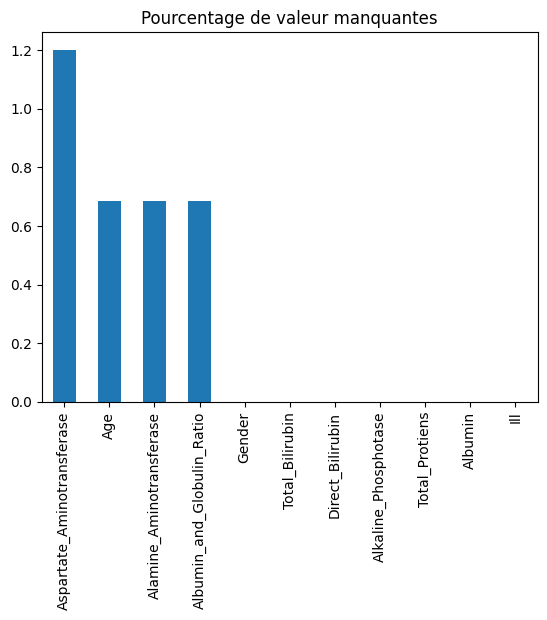

In [26]:
(df_foie.isna().mean().sort_values(ascending=False)*100).plot(kind = "bar", title = "Pourcentage de valeur manquantes")

<Axes: >

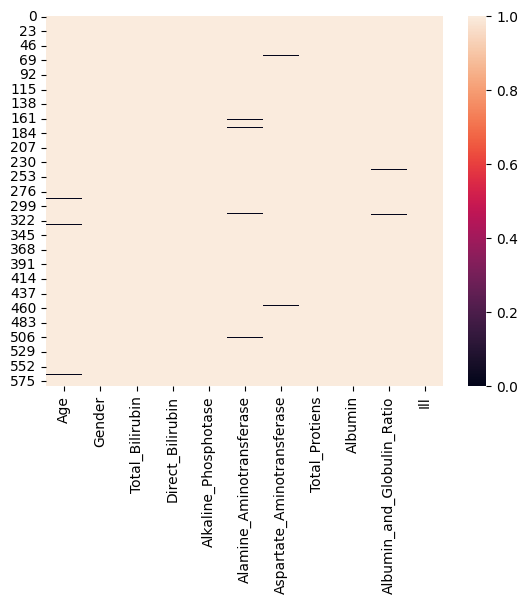

In [27]:
sns.heatmap(df_foie.notna())

In [28]:
for col in df_foie.select_dtypes(object).columns:
  print(df_foie[col].value_counts())
  print('\n')

Male      441
Female    142
Name: Gender, dtype: int64


yes    416
no     167
Name: Ill, dtype: int64




# Data visualisation et statistiques

<Axes: xlabel='Gender', ylabel='count'>

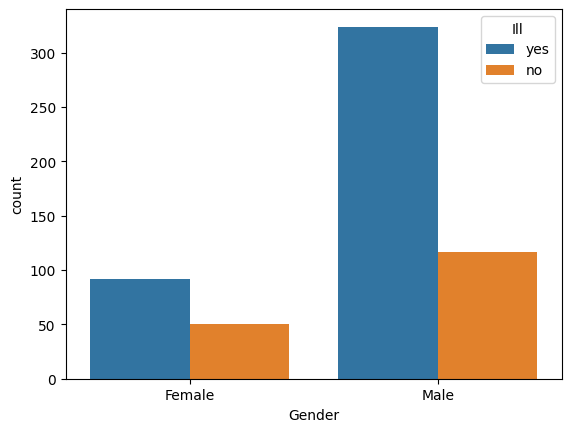

In [ ]:
sns.countplot(data = df_foie, x = 'Gender', hue='Ill')

Dans le dataset nous avons une grande majorité d'hommes, avec une proportion differentes de malades et de sains entre les hommes et les femmes

9












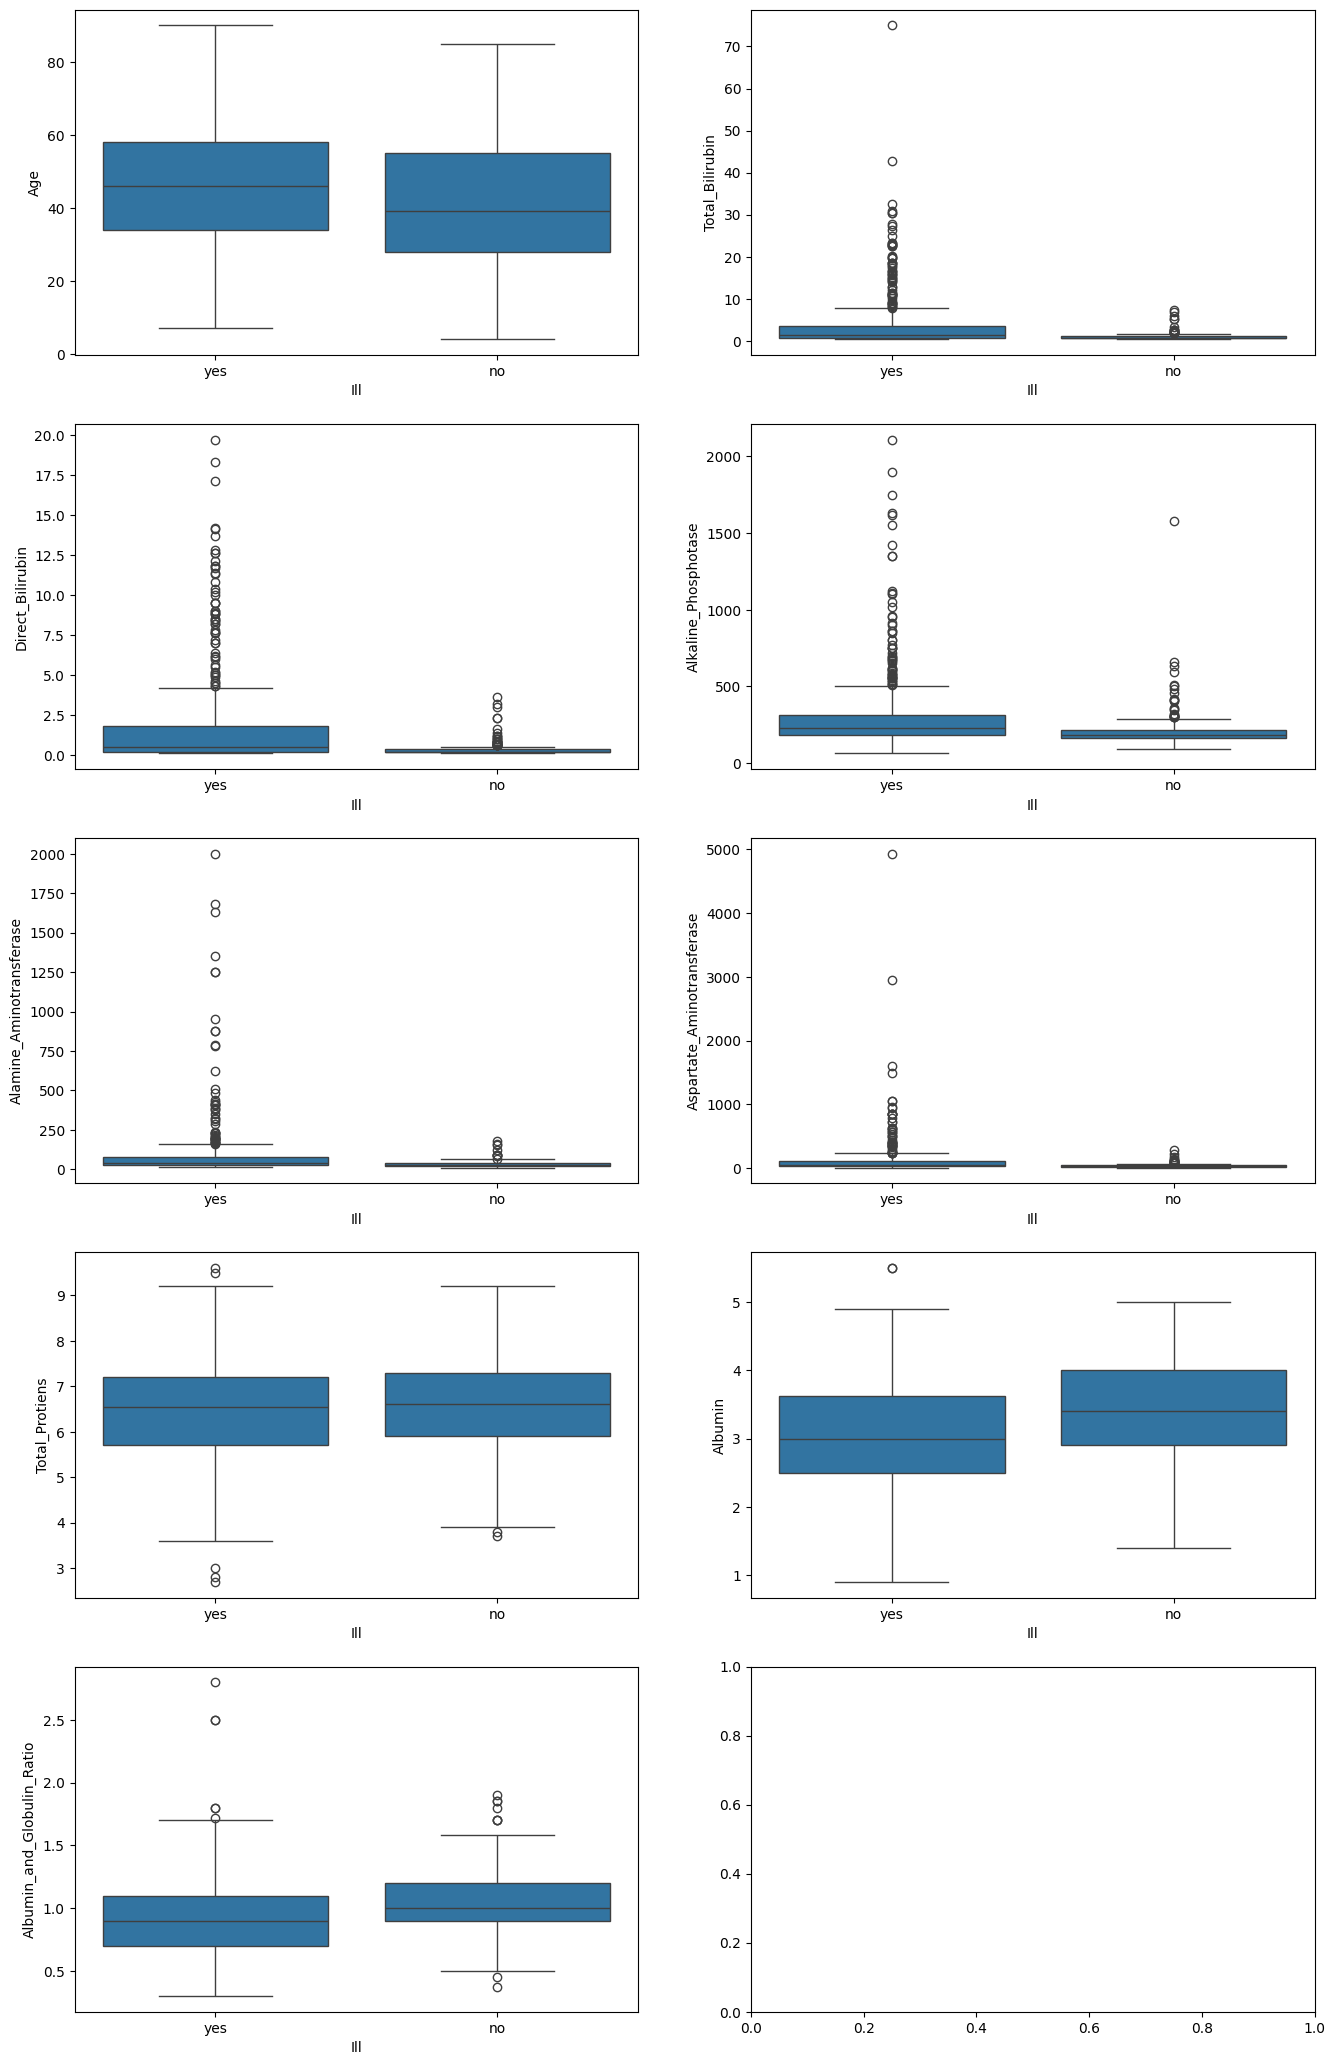

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
nbre_ligne = 5
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_foie.select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(y = df_foie[list_cols[id]], x = df_foie['Ill'], ax=axes[row,col]) #.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

On peut remarquer que ce sont les patients malades qui concentrent le plus d'outliers en termes statistique, cependant ces outliers n'en sont pas vraiment en termes médicales, on peut donc les considérer comme valides.

In [ ]:
list_cols = df_foie.select_dtypes([int,float]).columns.to_list()
list_cols = list_cols +['Ill']

9




















<Axes: xlabel='Ill', ylabel='Age'>

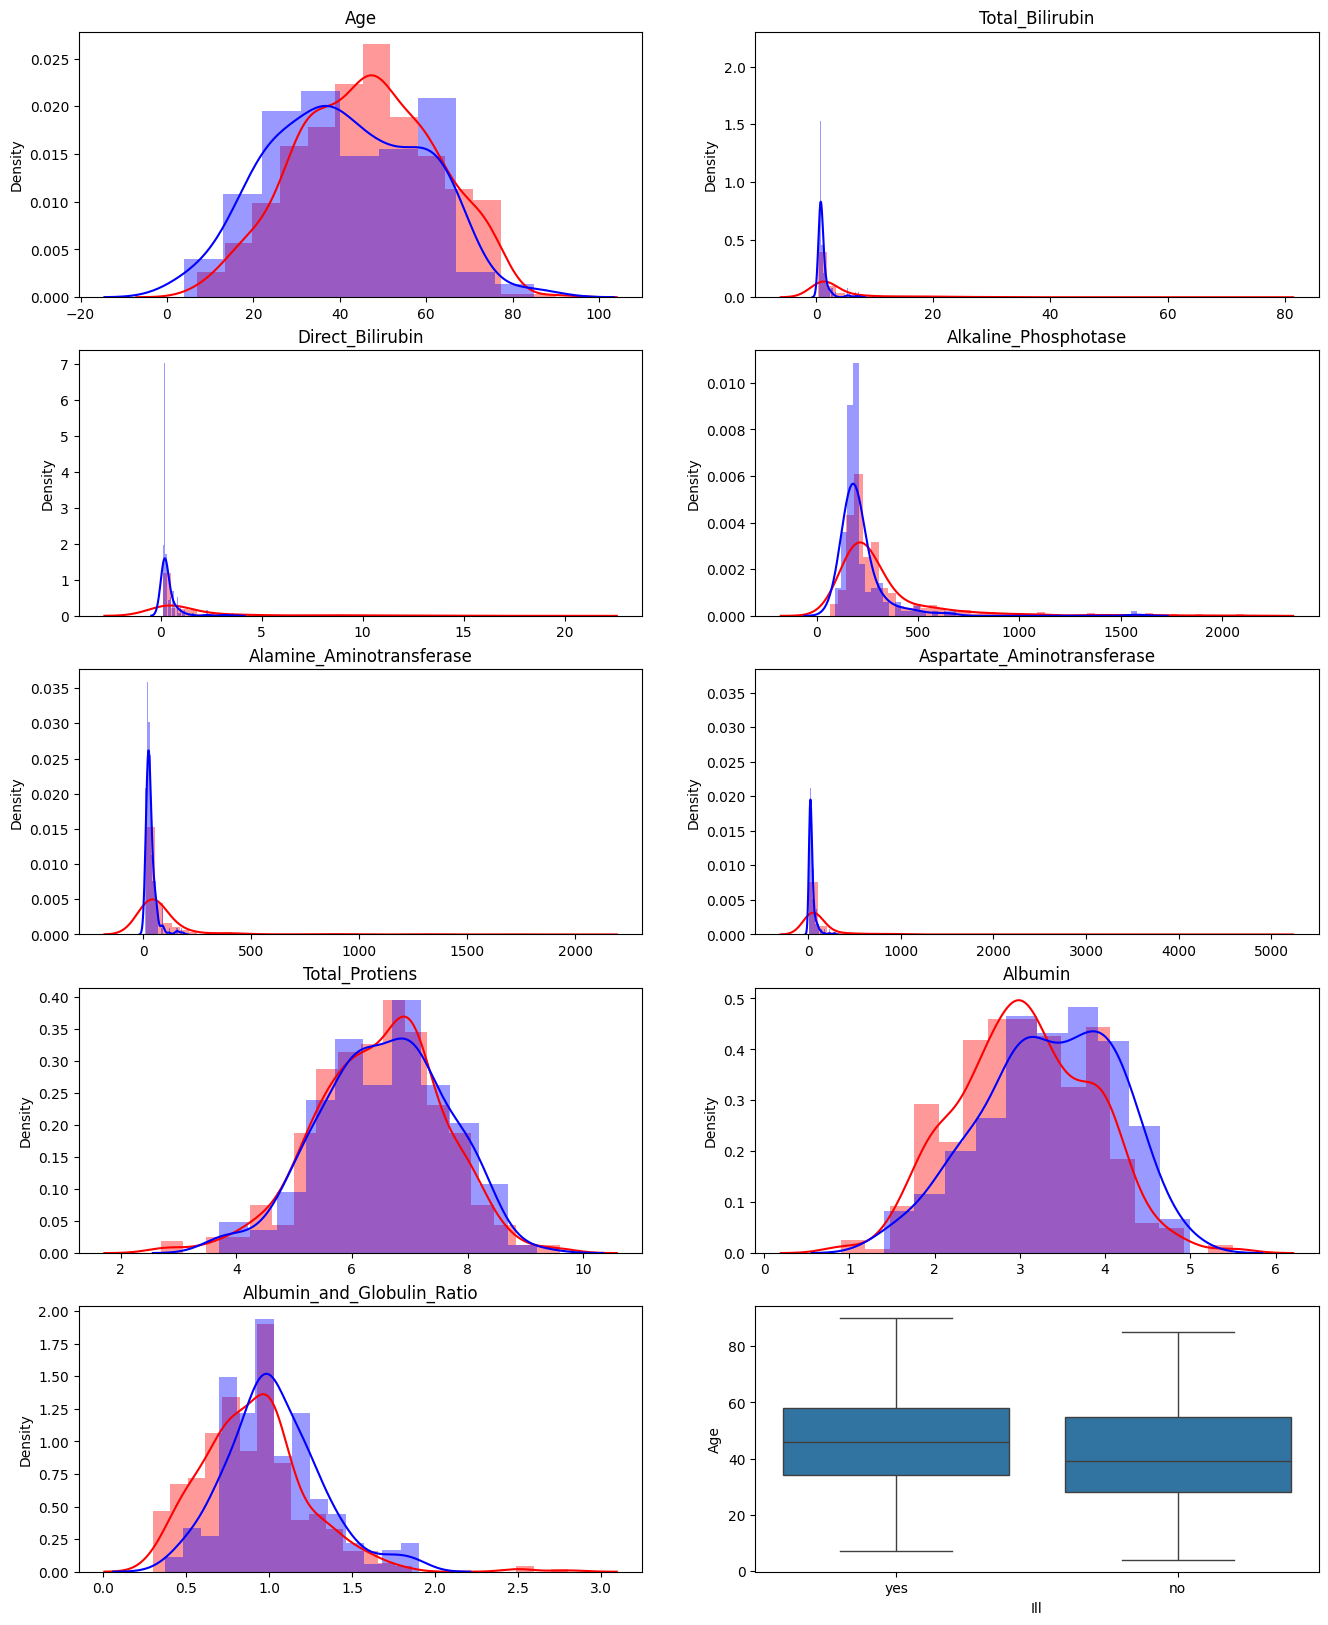

In [ ]:
nbre_ligne = 5
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 20))
list_cols = df_foie.select_dtypes([int,float]).columns.to_list()#+['Ill']

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      #plt.figure(figsize = (12,8))
      sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='yes'], ax=axes[row,col], color = 'red')
      sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col], color = 'blue')#.set(title=list_cols[id])
      axes[row,col].set_title(list_cols[id])
      id += 1
      print("\n")

sns.boxplot(y = df_foie[list_cols[0]], x = df_foie['Ill'], ax=axes[nbre_ligne-1,nbre_cols-1])



Nous pouvons observer que le taux d'albumin est legerement plus faibles pour les personnes malades que les personnes sains.



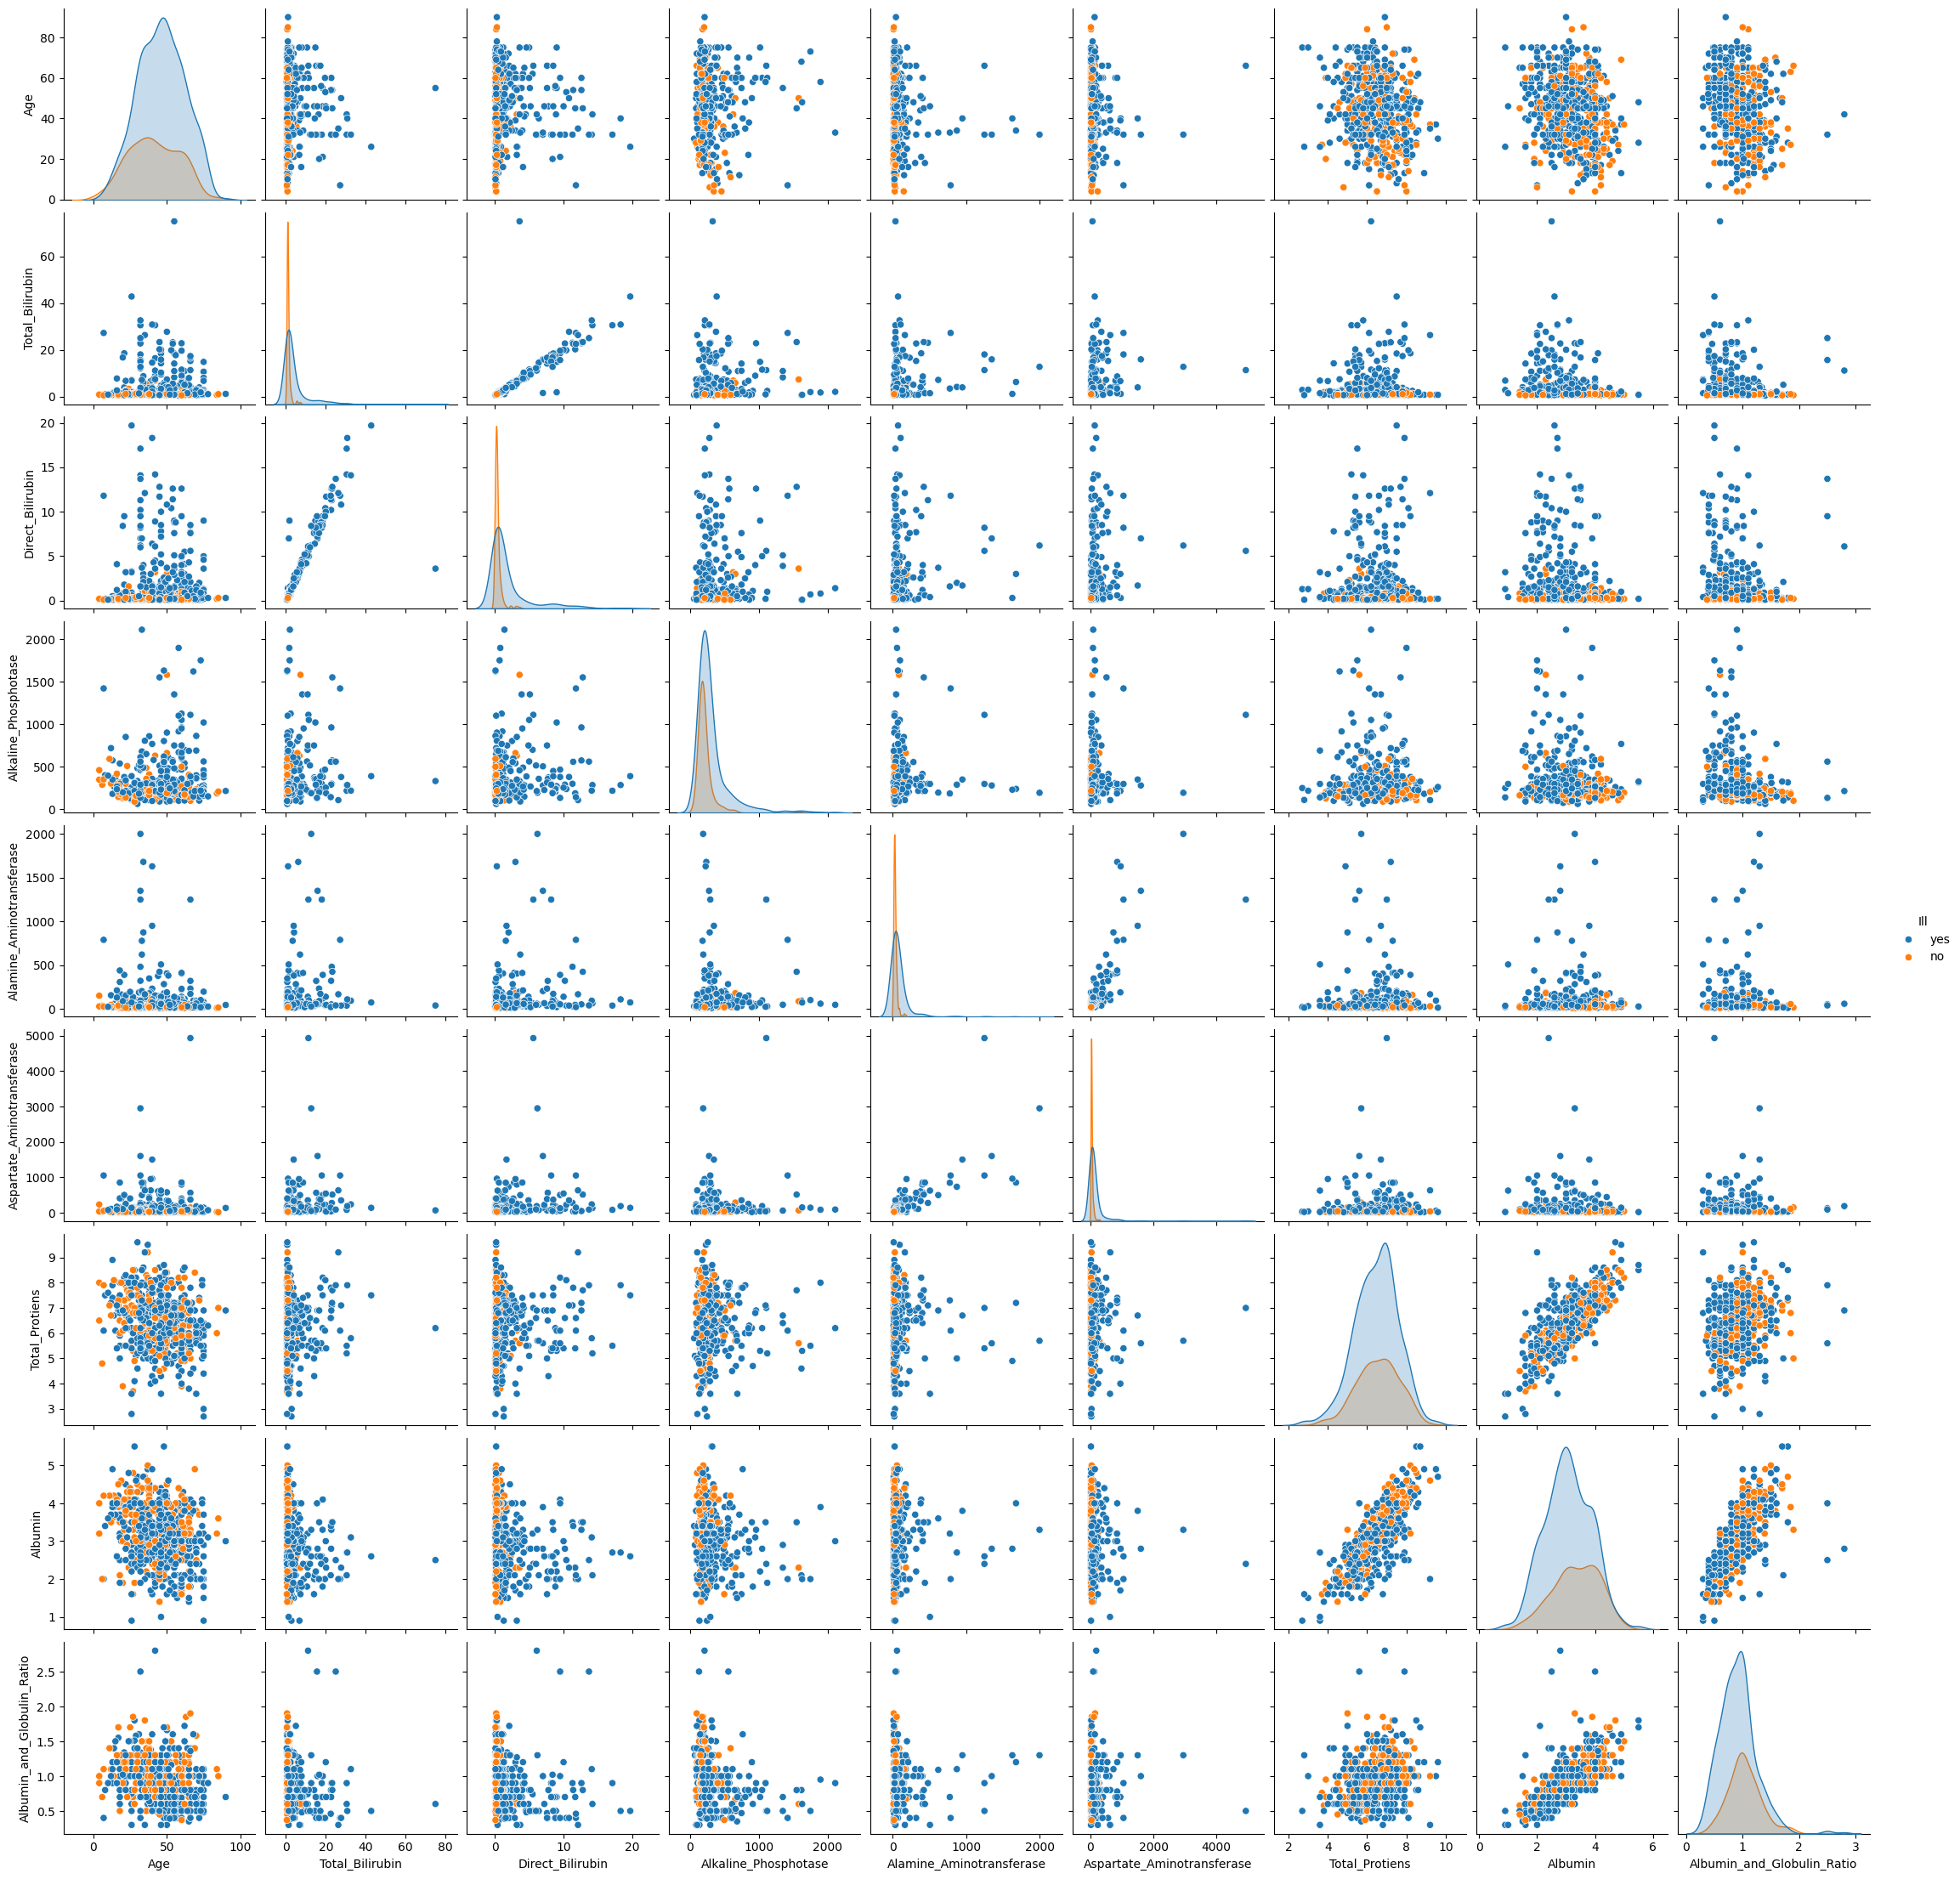

In [ ]:
columns_num = df_foie.select_dtypes([int,float]).columns.to_list().append('Ill')
# Pairplot
sns.pairplot(data = df_foie, hue = 'Ill')

<Axes: xlabel='Age', ylabel='Albumin'>

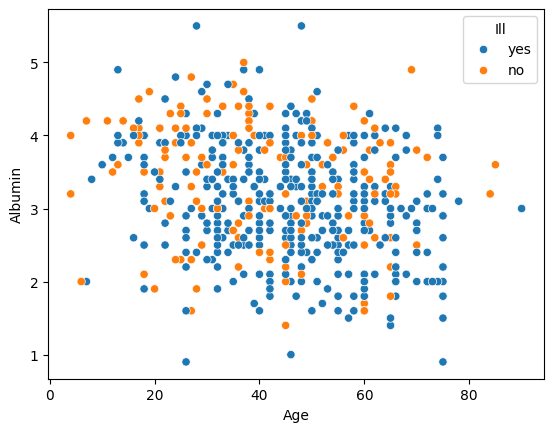

In [ ]:
sns.scatterplot(data = df_foie, x = 'Age', y = 'Albumin', hue = 'Ill')

In [ ]:
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Ill'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

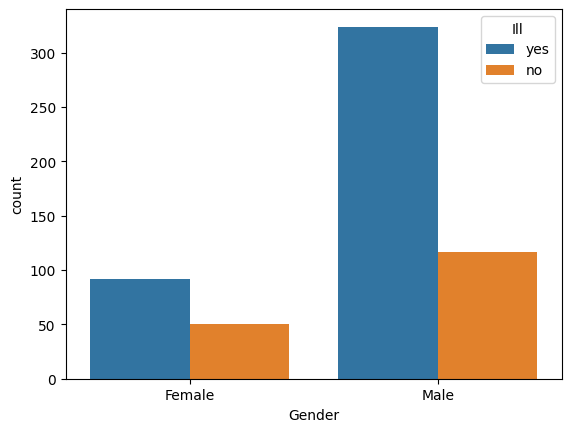

In [ ]:
sns.countplot(data=df_foie, x='Gender', hue='Ill')

# Traitement des valeurs manquantes

In [29]:
# Albumin_and_Globulin_Ratio est assymetrique onn remplace donc par la médiane
df_foie["Albumin_and_Globulin_Ratio"].fillna(df_foie["Albumin_and_Globulin_Ratio"].median(), inplace=True)
df_foie["Alamine_Aminotransferase"].fillna(df_foie["Alamine_Aminotransferase"].mean(), inplace=True)
df_foie["Age"].fillna(df_foie["Age"].median(), inplace=True)

<ipython-input-30-ed6e92ff0234>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_foie.corr(), annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)


<Axes: >

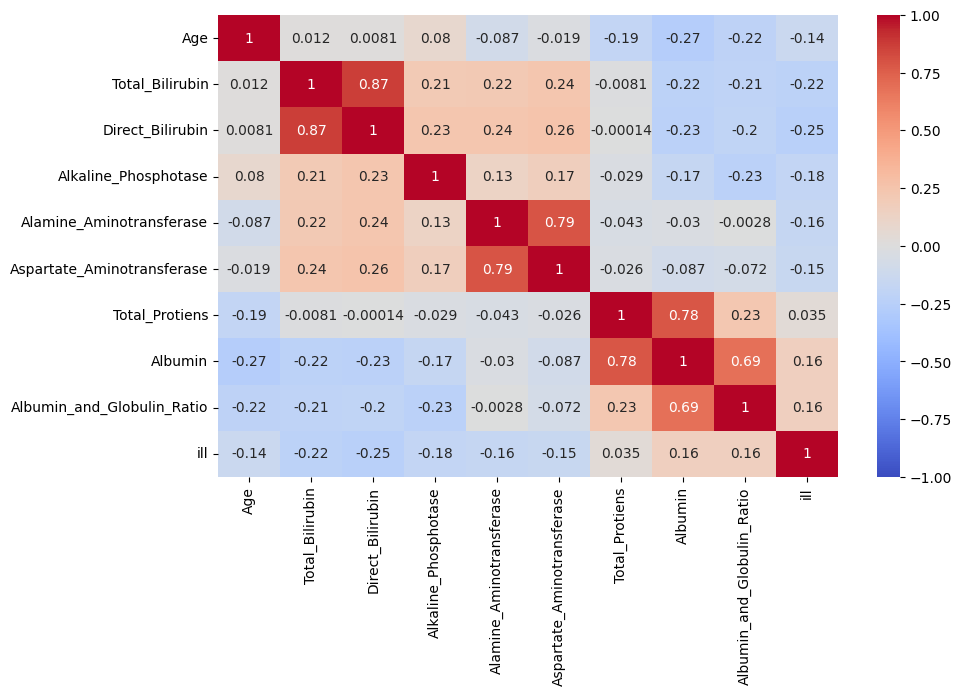

In [30]:
# Matrice de corrélation de Pearson
plt.figure(figsize = (10,6))
df_foie['ill'] = df_foie['Ill'].factorize()[0]
sns.heatmap(df_foie.corr(), annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)

Il y a certaines corrélations qui apparaisssent logiquement comme :
direct_bilirubin et le total_bilirubin

*   Direct_Bilirubin et le Total_Bilirubin
*   Aspartate_Aminotransferase et Alamine_Aminotransferase

*   Total_proteins et Albumin

On peut donc supprimmer 3 colonnes : Direct_Bilirubin, Aspartate_Aminotransferase et Total_Proteins







In [31]:
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Ill', 'ill'],
      dtype='object')

In [32]:
# Suppression des colonnes
df_foie.drop(columns = ["Direct_Bilirubin","Aspartate_Aminotransferase", "Total_Protiens"], inplace = True, errors='ignore')

In [33]:
#identifier variables catégorielles stockées dans une liste
cat_df = [col for col in df_foie.columns if df_foie[col].dtype == 'object']
num_df = [col for col in df_foie.columns if df_foie[col].dtype != 'object']

print(cat_df)
print(num_df)

['Gender', 'Ill']
['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio', 'ill']


In [34]:
#Test Anova pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = []

for col in num_df:
    result = smf.ols(f'{col} ~ Ill', data=df_foie).fit()
    table = sm.stats.anova_lm(result)
    F = table.iloc[0, 3]  # The F-statistic
    p_value = table.iloc[0, 4]  # The p-value
    results.append((col, F, p_value))

df_anova = pd.DataFrame(results, columns=['col', 'F', 'p_value'])
df_anova

,col,F,p_value
0,Age,1.110599e+01,9.151931e-04
1,Total_Bilirubin,2.960928e+01,7.801431e-08
2,Alkaline_Phosphotase,2.055844e+01,7.027487e-06
3,Alamine_Aminotransferase,1.612802e+01,6.697029e-05
4,Albumin,1.553743e+01,9.074361e-05
5,Albumin_and_Globulin_Ratio,1.568726e+01,8.400572e-05
6,ill,7.347351e+31,0.000000e+00


Toutes les variables numériques semblent influer sur la probabilité que le patient ait ou non une maladie chronique du foie excepté le total_protiens.

In [35]:
#Test chi2 pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
from scipy.stats import chi2_contingency

results = []

for col in cat_df:
    table = pd.crosstab(df_foie[col], df_foie['Ill'])
    test = chi2_contingency(table)
    #statistique = test[0]
    p_value = test[1]
    #degre_liberte = test[2]
    results.append((col, p_value))

df_chi2 = pd.DataFrame(results, columns=['col',  'p_value'])
df_chi2

,col,p_value
0,Gender,5.966585e-02
1,Ill,9.627152e-128


Toutes les variables ont passés le test de khi 2, elles ne sont donc pas independantes.

In [36]:
!pip install lazypredict

In [37]:
print(df_foie.columns)
df_foie.drop(columns='Ill',inplace=True, errors='ignore')
print(df_foie.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Ill', 'ill'],
      dtype='object')
Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'ill'],
      dtype='object')


<ipython-input-38-d5d6d15cb4b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_foie.corr(), annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)


<Axes: >

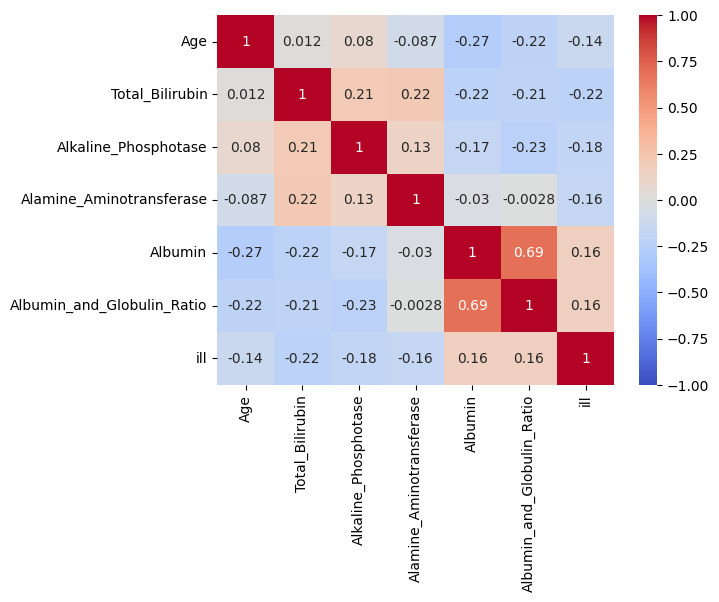

In [38]:
sns.heatmap(df_foie.corr(), annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)

#Machine learning

In [ ]:
df_foie.select_dtypes(exclude = object)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,ill
0,65.00,0.70,187,16.00,3.30,0.90,0
1,62.00,10.90,699,64.00,3.20,0.74,0
2,62.00,7.30,490,60.00,3.30,0.89,0
3,58.00,1.00,182,14.00,3.40,1.00,0
4,72.00,3.90,195,27.00,2.40,0.40,0
...,...,...,...,...,...,...,...
578,60.00,0.50,500,20.00,1.60,0.37,1
579,40.00,0.60,98,35.00,3.20,1.10,0
580,52.00,0.80,245,48.00,3.20,1.00,0
581,31.00,1.30,184,29.00,3.40,1.00,0


In [ ]:
!pip install lazypredict

In [ ]:
# Lazypredict
X = df_foie.drop(columns='ill').select_dtypes(exclude = object)
y= df_foie['ill']

In [ ]:
print(X.columns)

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 20.23it/s]

[LightGBM] [Info] Number of positive: 123, number of negative: 314
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 437, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281465 -> initscore=-0.937209
[LightGBM] [Info] Start training from score -0.937209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.61,0.71,0.71,0.61,0.02
QuadraticDiscriminantAnalysis,0.59,0.70,0.70,0.59,0.02
AdaBoostClassifier,0.74,0.65,0.65,0.72,0.13
LabelPropagation,0.71,0.63,0.63,0.70,0.03
XGBClassifier,0.72,0.63,0.63,0.71,0.09
SGDClassifier,0.68,0.63,0.63,0.68,0.02
LabelSpreading,0.70,0.62,0.62,0.69,0.04
LGBMClassifier,0.71,0.61,0.61,0.69,0.14
ExtraTreeClassifier,0.68,0.61,0.61,0.68,0.01


In [ ]:
models.sort_values(by='Balanced Accuracy', ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.61,0.71,0.71,0.61,0.02
QuadraticDiscriminantAnalysis,0.59,0.70,0.70,0.59,0.02
AdaBoostClassifier,0.74,0.65,0.65,0.72,0.13
LabelPropagation,0.71,0.63,0.63,0.70,0.03
XGBClassifier,0.72,0.63,0.63,0.71,0.09
SGDClassifier,0.68,0.63,0.63,0.68,0.02
LabelSpreading,0.70,0.62,0.62,0.69,0.04
LGBMClassifier,0.71,0.61,0.61,0.69,0.14
ExtraTreeClassifier,0.68,0.61,0.61,0.68,0.01


#Split

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=.25,random_state =123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

NameError: name 'X_res' is not defined

___
#ACP

In [ ]:
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Ill', 'ill'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler

X = df_foie.select_dtypes(exclude = object).drop(columns='ill')

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled.shape


(583, 6)

In [49]:
# Réduction de dimension
from sklearn.decomposition import PCA

pca = PCA()
X_pca=pca.fit_transform(X_scaled)

In [50]:
vars_list = X.columns

In [ ]:
df_foie

In [51]:
import plotly.express as px
fig = px.scatter_3d(x = X_pca[:,0],
                                y = X_pca[:,1],
                                z = X_pca[:,2],
                                color = df_foie['ill']
                    ) #Complete this code
fig.show()

In [ ]:
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Dataset dimension, it's a numpy array
X_pca.shape # >>> (150,4)

(583, 7)

In [ ]:
#fonction qui permet de tracer le graphes de corrélations selon les plans choisis
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=12, weight='bold',color='b')

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('CorrGraph_{}.jpg'.format(x_y), bbox_inches='tight')
    plt.show(block=False)

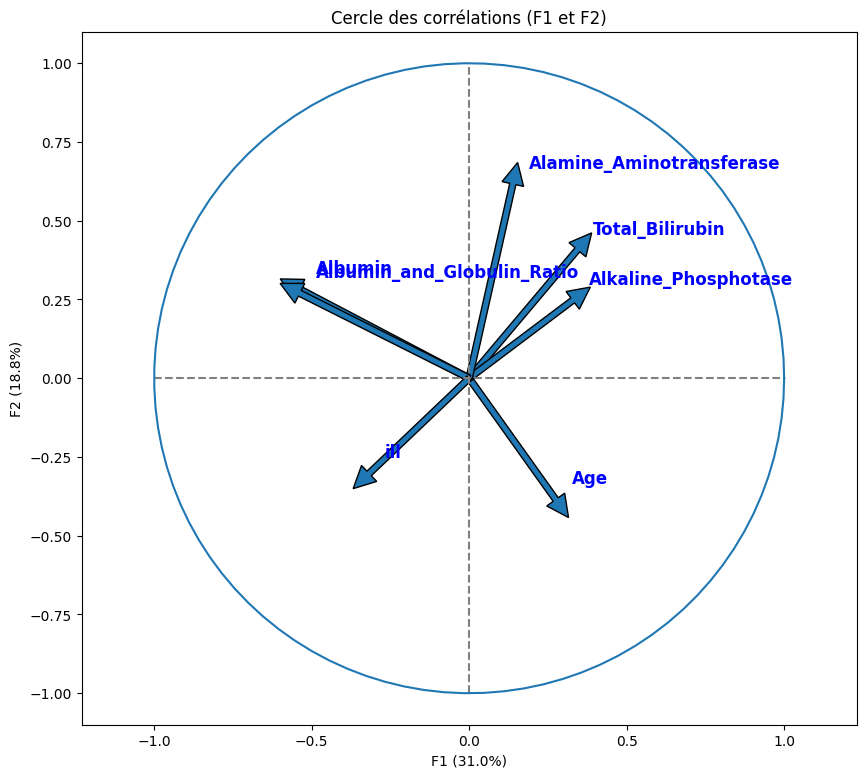

In [ ]:
x_y = (0,1)
x_y
correlation_graph(pca, x_y, vars_list)

In [ ]:
pca.explained_variance_ratio_

array([0.30969646, 0.18761578, 0.1318877 , 0.11883533, 0.10691951,
       0.10137519, 0.04367004])

In [ ]:
pca = PCA(n_components = 0.8)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(583, 5)

#Naive Bayes

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

dico = {'var_smoothing': [1e-11, 1e-10, 1e-9]}


#SGDClassifier

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier

dico = {"loss":["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
        "penalty":["l2", "l1", "elasticnet"],
        "learning_rate": ['optimal','adaptive',"invscaling"],
        "eta0" :  [0.01, 0.1, 0.5, 1],
        "validation_fraction": [0.1,0.5,0.7,1],
        "class_weight": [None,"balanced"],
        "warm_start": [False, True]}

rando = RandomizedSearchCV(SGDClassifier(), dico ,
                           n_iter=55)
rando.fit(X,y)
rando.best_params_

{'warm_start': False,
 'validation_fraction': 0.5,
 'penalty': 'l1',
 'loss': 'log_loss',
 'learning_rate': 'adaptive',
 'eta0': 0.5,
 'class_weight': None}

In [ ]:
#  'A': {'kernel' : ['linear', 'rbf', 'poly'],
#                       'gamma' : [0.1, 1, 10, 100],
#                       'C' : [0.1, 1, 10, 100, 1000],
#                       'degree' : [0, 1, 2, 3, 4, 5, 6, 'scale'],
#                       'shrinking' : [True, False]},

In [ ]:
# from sklearn.linear_model import SGDClassifier
# model = diff_models(X, dico)

In [ ]:
# model

In [ ]:
# np.array(['Malade','sain']).astype('<U7')

In [ ]:
X = df_foie.drop(columns='ill')
y= df_foie['ill']

In [ ]:
X

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
0,65.00,Female,0.70,187,16.00,3.30,0.90
1,62.00,Male,10.90,699,64.00,3.20,0.74
2,62.00,Male,7.30,490,60.00,3.30,0.89
3,58.00,Male,1.00,182,14.00,3.40,1.00
4,72.00,Male,3.90,195,27.00,2.40,0.40
...,...,...,...,...,...,...,...
578,60.00,Male,0.50,500,20.00,1.60,0.37
579,40.00,Male,0.60,98,35.00,3.20,1.10
580,52.00,Male,0.80,245,48.00,3.20,1.00
581,31.00,Male,1.30,184,29.00,3.40,1.00


In [ ]:
import numpy as np
dictionaire = {#'SVC' : {'kernel' : ['linear', 'rbf', 'poly'],
                      # 'gamma' : [0.1, 1, 10, 100],
                      # 'C' : [0.1, 1, 10, 100, 1000],
                      # 'degree' : [0, 1, 2, 3, 4, 5, 6, 'scale'],
                      # 'shrinking' : [True, False],
                      #   'random_state' : [42]},
               'LogisticRegression' : {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                                       'C' : [0.1, 1, 10, 100, 1000],
                                       'random_state' : [42]},
              #  'LinearSVC' : {'loss' : ['hinge', 'squared_hinge'],
              #                 'C' : [0.1, 1, 10, 100, 1000],
              #                 'intercept_scaling' : [1, 10, 100, 1000],
              #                 'penalty' : ['l1', 'l2'],
              #                 'multi_class' : ['ovr', 'crammer_singer'],
              #                 'max_iter' : [100, 500, 1000],
              #                 'random_state' : [42]},
                'Perceptron' : {'eta0' : [0.0001, 0.001, 0.01, 0.1, 1.0],
                                'max_iter' : [1, 10, 100, 1000],
                                'random_state' : [42],
                                'alpha' : [0.0001, 0.001, 0.01, 0.1],
                                'penalty' : ['l2','l1','elasticnet'],
                                'tol' : [None, 0.001, 0.002, 0.01, 0.1],
                                'class_weight' : [None, 'balanced'],
                                'random_state' : [42]
                                },
               'SGDClassifier' : {"loss":["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
                                  "penalty":["l2", "l1", "elasticnet"],
                                  "learning_rate": ['optimal','adaptive',"invscaling"],
                                  "eta0" :  [0.01, 0.1, 0.5, 1],
                                  "validation_fraction": [0,0.1,0.5,0.7,1],
                                  "class_weight": [None,"balanced"],
                                  "warm_start": [False, True],
                                  #"average": [False]+[i for i in np.arange(0,1.1,0.1)],
                                  'random_state' : [42]},
               "GaussianNB" : {'var_smoothing': [1e-11, 1e-10, 1e-9]},
               "MLPClassifier" : {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                   'hidden_layer_sizes' : [100, 200, 300, 400, 500],
                   'solver' : ['lbfgs', 'sgd', 'adam'],
                   'learning_rate' : ['constant', 'invscaling', 'adaptive'],
                    'learning_rate_init' : [0.001, 0.0001, 0.00001],
                    'power_t' : [0.5, 1, 5, 10],
                    'random_state' : [42],
                    'momentum' : list(np.arange(0,1.1,0.1)),
                    'beta_1' : list(np.arange(0,1.1,0.1)),
                    'beta_2' : [0.5, 0.6, 0.999, 0.999999],
                    'n_iter_no_change' : list(np.arange(10, 100, 10)),
                    'max_fun' : [15000, 20000, 25000, 30000]
                   },
               "RandomForestClassifier": {'n_estimators': range(1, 200),
                                           'max_depth': range(1, 100),
                                           'min_samples_split': range(2,30),
                                           'min_samples_leaf': range(1, 10),
                                           'bootstrap': [True, False],
                                           'class_weight': [None, 'balanced']}
               }



import numpy as np

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, Binarizer

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


liste_scaler = [StandardScaler(),
                  MinMaxScaler(),
                  MaxAbsScaler(),
                  QuantileTransformer(),
                  PowerTransformer(),
                  Normalizer(),
                RobustScaler()]
liste_encoder = [OneHotEncoder()#,
                  # OrdinalEncoder(),
                  # KBinsDiscretizer(),
                  # Binarizer()
                  ]

nbre_combinaison = len(liste_scaler)*len(liste_encoder)

# Combinaisons des listes

scaler_encoder = [(scaler, encoder) for scaler in liste_scaler for encoder in liste_encoder]


def find_best_param(X, y, model, scaler_encoder):
  i = 1

  for scaler, encoder in scaler_encoder:
      selector_num_cols = selector(dtype_exclude=object)
      selector_cat_cols = selector(dtype_include=object)

      num_cols = selector_num_cols(X)
      cat_cols = selector_cat_cols(X)


      num_preprocessor = scaler
      cat_preprocessor = encoder

      preprocessor = ColumnTransformer(
                  [
                      (str(cat_preprocessor)[:-2], cat_preprocessor, cat_cols),
                      (str(num_preprocessor)[:-2], num_preprocessor, num_cols),
                  ]
              )
      random = RandomizedSearchCV(model,
                                              dictionaire[str(model)[:-2]],
                                              n_iter= 10,
                                              cv = 5)

      Model = make_pipeline(
                                  preprocessor,
                                  random
                              )


      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69, train_size=0.8)
      Model.fit(X_train, y_train)

      print('Scaler', scaler)
      print('Encoder', encoder)
      print(f'For {model} the best parametres are \n {random.best_params_}')
      print(f' Accuracy train : {Model.score(X_train, y_train)}')
      print(f' Accuracy test : {Model.score(X_test, y_test)}')
      print('Model',f"{list(dictionaire.keys()).index(str(model)[:-2])+1}/{len(dictionaire)}")
      print('Pipelines testés :',f"{i}/{len(scaler_encoder)}\n")
      if i == scaler_encoder:
        i=1
      else:
        i+=1

      display(pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = Model.predict(X_test)),
          columns = np.array([str(i) for i in Model.classes_]).astype(object) + ' predicted',
          index = np.array([str(i) for i in Model.classes_]).astype(object) + ' actual'
          ))



for model in list(dictionaire.keys()):
  exec(f"find_best_param(X_train, y_train,{model}(),scaler_encoder)")


Scaler StandardScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 0.1}
 Accuracy train : 0.7392550143266475
 Accuracy test : 0.7272727272727273
Model 1/6
Pipelines testés : 1/7



,0 predicted,1 predicted
0 actual,63,3
1 actual,21,1


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 10}
 Accuracy train : 0.7363896848137536
 Accuracy test : 0.7272727272727273
Model 1/6
Pipelines testés : 2/7



,0 predicted,1 predicted
0 actual,63,3
1 actual,21,1


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 10}
 Accuracy train : 0.7363896848137536
 Accuracy test : 0.7272727272727273
Model 1/6
Pipelines testés : 3/7



,0 predicted,1 predicted
0 actual,63,3
1 actual,21,1


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'newton-cg', 'random_state': 42, 'C': 100}
 Accuracy train : 0.7277936962750716
 Accuracy test : 0.75
Model 1/6
Pipelines testés : 4/7



,0 predicted,1 predicted
0 actual,61,5
1 actual,17,5


Scaler PowerTransformer()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 0.1}
 Accuracy train : 0.7277936962750716
 Accuracy test : 0.75
Model 1/6
Pipelines testés : 5/7



,0 predicted,1 predicted
0 actual,62,4
1 actual,18,4


Scaler Normalizer()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'liblinear', 'random_state': 42, 'C': 1000}
 Accuracy train : 0.7306590257879656
 Accuracy test : 0.7386363636363636
Model 1/6
Pipelines testés : 6/7



,0 predicted,1 predicted
0 actual,64,2
1 actual,21,1


Scaler RobustScaler()
Encoder OneHotEncoder()
For LogisticRegression() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'C': 1}
 Accuracy train : 0.7392550143266475
 Accuracy test : 0.7045454545454546
Model 1/6
Pipelines testés : 7/7



,0 predicted,1 predicted
0 actual,61,5
1 actual,21,1


Scaler StandardScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.1, 'random_state': 42, 'penalty': 'l1', 'max_iter': 100, 'eta0': 0.1, 'class_weight': None, 'alpha': 0.01}
 Accuracy train : 0.7106017191977078
 Accuracy test : 0.75
Model 2/6
Pipelines testés : 1/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.1, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1, 'eta0': 0.0001, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.7106017191977078
 Accuracy test : 0.75
Model 2/6
Pipelines testés : 2/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1, 'eta0': 0.0001, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.7106017191977078
 Accuracy test : 0.75
Model 2/6
Pipelines testés : 3/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': None, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1, 'eta0': 0.0001, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.7077363896848138
 Accuracy test : 0.75
Model 2/6
Pipelines testés : 4/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler PowerTransformer()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.01, 'random_state': 42, 'penalty': 'l1', 'max_iter': 1000, 'eta0': 0.01, 'class_weight': None, 'alpha': 0.01}
 Accuracy train : 0.7106017191977078
 Accuracy test : 0.75
Model 2/6
Pipelines testés : 5/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler Normalizer()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.002, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.1, 'class_weight': None, 'alpha': 0.001}
 Accuracy train : 0.36962750716332377
 Accuracy test : 0.32954545454545453
Model 2/6
Pipelines testés : 6/7



,0 predicted,1 predicted
0 actual,7,59
1 actual,0,22


Scaler RobustScaler()
Encoder OneHotEncoder()
For Perceptron() the best parametres are 
 {'tol': 0.1, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.001, 'class_weight': None, 'alpha': 0.0001}
 Accuracy train : 0.5444126074498568
 Accuracy test : 0.5795454545454546
Model 2/6
Pipelines testés : 7/7



,0 predicted,1 predicted
0 actual,49,17
1 actual,20,2


Scaler StandardScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'squared_error', 'learning_rate': 'invscaling', 'eta0': 0.01, 'class_weight': None}
 Accuracy train : 0.7191977077363897
 Accuracy test : 0.7045454545454546
Model 3/6
Pipelines testés : 1/7



,0 predicted,1 predicted
0 actual,61,5
1 actual,21,1


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'squared_epsilon_insensitive', 'learning_rate': 'invscaling', 'eta0': 0.5, 'class_weight': None}
 Accuracy train : 0.7306590257879656
 Accuracy test : 0.7045454545454546
Model 3/6
Pipelines testés : 2/7



,0 predicted,1 predicted
0 actual,61,5
1 actual,21,1


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'modified_huber', 'learning_rate': 'adaptive', 'eta0': 0.01, 'class_weight': None}
 Accuracy train : 0.7306590257879656
 Accuracy test : 0.75
Model 3/6
Pipelines testés : 3/7



,0 predicted,1 predicted
0 actual,65,1
1 actual,21,1


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.1, 'random_state': 42, 'penalty': 'l1', 'loss': 'squared_hinge', 'learning_rate': 'adaptive', 'eta0': 1, 'class_weight': None}
 Accuracy train : 0.7335243553008596
 Accuracy test : 0.7613636363636364
Model 3/6
Pipelines testés : 4/7



,0 predicted,1 predicted
0 actual,62,4
1 actual,17,5


Scaler PowerTransformer()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'squared_hinge', 'learning_rate': 'invscaling', 'eta0': 0.1, 'class_weight': None}
 Accuracy train : 0.7277936962750716
 Accuracy test : 0.7272727272727273
Model 3/6
Pipelines testés : 5/7



,0 predicted,1 predicted
0 actual,62,4
1 actual,20,2


Scaler Normalizer()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': True, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'squared_hinge', 'learning_rate': 'invscaling', 'eta0': 0.1, 'class_weight': None}
 Accuracy train : 0.7106017191977078
 Accuracy test : 0.75
Model 3/6
Pipelines testés : 6/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler RobustScaler()
Encoder OneHotEncoder()
For SGDClassifier() the best parametres are 
 {'warm_start': False, 'validation_fraction': 0.7, 'random_state': 42, 'penalty': 'elasticnet', 'loss': 'squared_error', 'learning_rate': 'invscaling', 'eta0': 0.01, 'class_weight': None}
 Accuracy train : 0.7220630372492837
 Accuracy test : 0.75
Model 3/6
Pipelines testés : 7/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler StandardScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.5558739255014327
 Accuracy test : 0.5
Model 4/6
Pipelines testés : 1/7



,0 predicted,1 predicted
0 actual,23,43
1 actual,1,21


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.5558739255014327
 Accuracy test : 0.5
Model 4/6
Pipelines testés : 2/7



,0 predicted,1 predicted
0 actual,23,43
1 actual,1,21


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.5558739255014327
 Accuracy test : 0.5
Model 4/6
Pipelines testés : 3/7



,0 predicted,1 predicted
0 actual,23,43
1 actual,1,21


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.6991404011461319
 Accuracy test : 0.6931818181818182
Model 4/6
Pipelines testés : 4/7



,0 predicted,1 predicted
0 actual,49,17
1 actual,10,12


Scaler PowerTransformer()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.673352435530086
 Accuracy test : 0.7045454545454546
Model 4/6
Pipelines testés : 5/7



,0 predicted,1 predicted
0 actual,50,16
1 actual,10,12


Scaler Normalizer()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.5472779369627507
 Accuracy test : 0.5227272727272727
Model 4/6
Pipelines testés : 6/7



,0 predicted,1 predicted
0 actual,27,39
1 actual,3,19


Scaler RobustScaler()
Encoder OneHotEncoder()
For GaussianNB() the best parametres are 
 {'var_smoothing': 1e-11}
 Accuracy train : 0.5558739255014327
 Accuracy test : 0.5
Model 4/6
Pipelines testés : 7/7



,0 predicted,1 predicted
0 actual,23,43
1 actual,1,21


Scaler StandardScaler()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'adam', 'random_state': 42, 'power_t': 10, 'n_iter_no_change': 70, 'momentum': 0.5, 'max_fun': 25000, 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': 400, 'beta_2': 0.6, 'beta_1': 0.30000000000000004, 'activation': 'identity'}
 Accuracy train : 0.7392550143266475
 Accuracy test : 0.7272727272727273
Model 5/6
Pipelines testés : 1/7



,0 predicted,1 predicted
0 actual,63,3
1 actual,21,1


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'power_t': 0.5, 'n_iter_no_change': 40, 'momentum': 0.8, 'max_fun': 15000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 500, 'beta_2': 0.999999, 'beta_1': 0.9, 'activation': 'identity'}
 Accuracy train : 0.7478510028653295
 Accuracy test : 0.7045454545454546
Model 5/6
Pipelines testés : 2/7



,0 predicted,1 predicted
0 actual,60,6
1 actual,20,2


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'adam', 'random_state': 42, 'power_t': 5, 'n_iter_no_change': 80, 'momentum': 0.8, 'max_fun': 30000, 'learning_rate_init': 1e-05, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 300, 'beta_2': 0.5, 'beta_1': 0.1, 'activation': 'identity'}
 Accuracy train : 0.7106017191977078
 Accuracy test : 0.75
Model 5/6
Pipelines testés : 3/7



,0 predicted,1 predicted
0 actual,66,0
1 actual,22,0


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'adam', 'random_state': 42, 'power_t': 10, 'n_iter_no_change': 20, 'momentum': 0.8, 'max_fun': 30000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 300, 'beta_2': 0.6, 'beta_1': 0.8, 'activation': 'tanh'}
 Accuracy train : 0.7335243553008596
 Accuracy test : 0.75
Model 5/6
Pipelines testés : 4/7



,0 predicted,1 predicted
0 actual,62,4
1 actual,18,4


Scaler PowerTransformer()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'adam', 'random_state': 42, 'power_t': 5, 'n_iter_no_change': 40, 'momentum': 0.2, 'max_fun': 30000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 200, 'beta_2': 0.5, 'beta_1': 0.2, 'activation': 'identity'}
 Accuracy train : 0.7335243553008596
 Accuracy test : 0.75
Model 5/6
Pipelines testés : 5/7



,0 predicted,1 predicted
0 actual,61,5
1 actual,17,5


Scaler Normalizer()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'lbfgs', 'random_state': 42, 'power_t': 5, 'n_iter_no_change': 50, 'momentum': 0.4, 'max_fun': 25000, 'learning_rate_init': 0.0001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'beta_2': 0.999, 'beta_1': 0.7000000000000001, 'activation': 'logistic'}
 Accuracy train : 0.7392550143266475
 Accuracy test : 0.7613636363636364
Model 5/6
Pipelines testés : 6/7



,0 predicted,1 predicted
0 actual,60,6
1 actual,15,7


Scaler RobustScaler()
Encoder OneHotEncoder()
For MLPClassifier() the best parametres are 
 {'solver': 'adam', 'random_state': 42, 'power_t': 5, 'n_iter_no_change': 70, 'momentum': 0.9, 'max_fun': 20000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 200, 'beta_2': 0.6, 'beta_1': 0.7000000000000001, 'activation': 'identity'}
 Accuracy train : 0.7449856733524355
 Accuracy test : 0.7045454545454546
Model 5/6
Pipelines testés : 7/7



,0 predicted,1 predicted
0 actual,60,6
1 actual,20,2


Scaler StandardScaler()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 27, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 66, 'class_weight': None, 'bootstrap': False}
 Accuracy train : 0.997134670487106
 Accuracy test : 0.6931818181818182
Model 6/6
Pipelines testés : 1/7



,0 predicted,1 predicted
0 actual,57,9
1 actual,18,4


Scaler MinMaxScaler()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 167, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 65, 'class_weight': None, 'bootstrap': True}
 Accuracy train : 0.836676217765043
 Accuracy test : 0.7159090909090909
Model 6/6
Pipelines testés : 2/7



,0 predicted,1 predicted
0 actual,60,6
1 actual,19,3


Scaler MaxAbsScaler()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 108, 'min_samples_split': 26, 'min_samples_leaf': 7, 'max_depth': 30, 'class_weight': None, 'bootstrap': False}
 Accuracy train : 0.8681948424068768
 Accuracy test : 0.7045454545454546
Model 6/6
Pipelines testés : 3/7



,0 predicted,1 predicted
0 actual,59,7
1 actual,19,3


Scaler QuantileTransformer()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 12, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 94, 'class_weight': None, 'bootstrap': True}
 Accuracy train : 0.839541547277937
 Accuracy test : 0.7159090909090909
Model 6/6
Pipelines testés : 4/7



,0 predicted,1 predicted
0 actual,60,6
1 actual,19,3


Scaler PowerTransformer()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 187, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 28, 'class_weight': None, 'bootstrap': False}
 Accuracy train : 0.9914040114613181
 Accuracy test : 0.7045454545454546
Model 6/6
Pipelines testés : 5/7



,0 predicted,1 predicted
0 actual,59,7
1 actual,19,3


Scaler Normalizer()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 93, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_depth': 74, 'class_weight': None, 'bootstrap': True}
 Accuracy train : 0.8853868194842407
 Accuracy test : 0.6931818181818182
Model 6/6
Pipelines testés : 6/7



,0 predicted,1 predicted
0 actual,59,7
1 actual,20,2


Scaler RobustScaler()
Encoder OneHotEncoder()
For RandomForestClassifier() the best parametres are 
 {'n_estimators': 153, 'min_samples_split': 21, 'min_samples_leaf': 9, 'max_depth': 83, 'class_weight': None, 'bootstrap': True}
 Accuracy train : 0.8137535816618912
 Accuracy test : 0.7272727272727273
Model 6/6
Pipelines testés : 7/7



,0 predicted,1 predicted
0 actual,60,6
1 actual,18,4


In [ ]:
# Scaler Normalizer()
# Encoder OneHotEncoder()
# For MLPClassifier() the best parametres are
#  {'solver': 'lbfgs', 'random_state': 42, 'power_t': 5, 'n_iter_no_change': 50, 'momentum': 0.4, 'max_fun': 25000, 'learning_rate_init': 0.0001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'beta_2': 0.999, 'beta_1': 0.7000000000000001, 'activation': 'logistic'}
#  Accuracy train : 0.7392550143266475
#  Accuracy test : 0.7613636363636364
# Model 5/6
# Pipelines testés : 6/7

# Scaler PowerTransformer()
# Encoder OneHotEncoder()
# For GaussianNB() the best parametres are
#  {'var_smoothing': 1e-11}
#  Accuracy train : 0.673352435530086
#  Accuracy test : 0.7045454545454546
# Model 4/6
# Pipelines testés : 5/7

# Scaler StandardScaler()
# Encoder OneHotEncoder()
# For LogisticRegression() the best parametres are
#  {'solver': 'liblinear', 'random_state': 42, 'C': 0.1}
#  Accuracy train : 0.7392550143266475
#  Accuracy test : 0.7272727272727273
# Model 1/6
# Pipelines testés : 1/7



In [ ]:
X.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

#MODELE D'ENSEMBLE

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: ill, Length: 583, dtype: int64

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    OneHotEncoder
)
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
from joblib import dump, load


# Scaler StandardScaler()
# Encoder OneHotEncoder()
# For LogisticRegression() the best parametres are
#  {'solver': 'liblinear', 'random_state': 42, 'C': 0.1}
#  Accuracy train : 0.7392550143266475
#  Accuracy test : 0.7272727272727273
# Model 1/6
# Pipelines testés : 1/7


model_list = [MLPClassifier(solver='lbfgs', random_state=42, power_t= 5, n_iter_no_change=50,
                            momentum=0.4, max_fun=25000, learning_rate_init= 0.0001, learning_rate='adaptive',
                            hidden_layer_sizes=100, beta_2= 0.999, beta_1= 0.7, activation='logistic', max_iter=3000),
              GaussianNB(var_smoothing=1e-11),
              LogisticRegression(solver='liblinear', random_state = 42, C = 0.1, class_weight={'ill': weight})]


scaler_list = [Normalizer(),  PowerTransformer(), StandardScaler()]
#df_cardiac = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/heartDisease.csv')
#df_cardiac.drop_duplicates(inplace=True)
#df_cardiac[['cp', 'restecg', 'slope', 'ca', 'thal']]= df_cardiac[['cp', 'restecg', 'slope', 'ca', 'thal']].astype('object')

X = df_foie.drop(columns='ill')
y= df_foie['ill']

list_estimators = []

for model, scaler in zip(model_list, scaler_list):
    selector_num_cols = selector(dtype_exclude=object)
    selector_cat_cols = selector(dtype_include=object)
    #application of selectors
    num_cols = selector_num_cols(X)
    cat_cols = selector_cat_cols(X)

    #definition of processors for two types of data
    num_preprocessor = scaler
    cat_preprocessor = OneHotEncoder()
    #definition of columns transformation
    preprocessor = ColumnTransformer(
                    [("Category", cat_preprocessor, cat_cols),
                    ("Scaler", num_preprocessor, num_cols)])


    Model = make_pipeline(preprocessor,
                          model)
    list_estimators.append((str(model), Model))

clf = StackingClassifier(
    estimators=list_estimators, final_estimator=LogisticRegression(max_iter=1000))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

clf.fit(X_train,y_train)



print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

#dump(clf, 'regression_model_saved.joblib')

0.7353535353535353
0.7954545454545454


In [ ]:
clf

display(pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = clf.predict(X_test)),
          columns = np.array([str(i) for i in clf.classes_]).astype(object) + ' predicted',
          index = np.array([str(i) for i in clf.classes_]).astype(object) + ' actual'
          ))

,0 predicted,1 predicted
0 actual,62,6
1 actual,12,8


#MODELE

In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler, OrdinalEncoder, KBinsDiscretizer, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier


selector_num_cols = selector(dtype_exclude=object)
selector_cat_cols = selector(dtype_include=object)

num_cols = selector_num_cols(X)
cat_cols = selector_cat_cols(X)

num_preprocessor = Normalizer()
cat_preprocessor = KBinsDiscretizer()


preprocessor = ColumnTransformer(
            [
                ("Normalizer", cat_preprocessor, cat_cols),
                ("StandardScaler", num_preprocessor, num_cols),
            ]
        )

Model_SVC = make_pipeline(
                            preprocessor,
                            RandomForestClassifier(n_estimators=73, min_samples_split = 15, min_samples_leaf = 6, max_depth = 43, class_weight=None, bootstrap=True)
                        )



In [ ]:
Model_SVC.fit(X_train,y_train)
print(Model_SVC.score(X_train,y_train))
print(Model_SVC.score(X_test,y_test))
Model_SVC.predict_proba(X_test)

0.8649885583524027
0.7191780821917808


array([[0.6101604 , 0.3898396 ],
       [0.99600457, 0.00399543],
       [0.95105079, 0.04894921],
       [0.52751219, 0.47248781],
       [0.94150408, 0.05849592],
       [0.70159101, 0.29840899],
       [0.81021726, 0.18978274],
       [0.52628257, 0.47371743],
       [0.56734874, 0.43265126],
       [0.98675107, 0.01324893],
       [0.51301232, 0.48698768],
       [0.85051376, 0.14948624],
       [0.49538238, 0.50461762],
       [0.45626461, 0.54373539],
       [0.89084502, 0.10915498],
       [0.38433987, 0.61566013],
       [0.7193684 , 0.2806316 ],
       [0.93819595, 0.06180405],
       [0.96668465, 0.03331535],
       [0.9194662 , 0.0805338 ],
       [0.58296623, 0.41703377],
       [0.55781615, 0.44218385],
       [0.91404134, 0.08595866],
       [0.69732646, 0.30267354],
       [0.67261956, 0.32738044],
       [0.66654423, 0.33345577],
       [0.61126156, 0.38873844],
       [0.71768481, 0.28231519],
       [0.91753984, 0.08246016],
       [0.9659275 , 0.0340725 ],
       [0.

Scaler Normalizer()
Encoder OneHotEncoder()

For RandomForestClassifier() the best parametres are
 {'n_estimators': 73, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_depth': 43, 'class_weight': None, 'bootstrap': True}
 Accuracy train : 0.8481375358166189
 Accuracy test : 0.7386363636363636
Model 6/6
Pipelines testés : 6/7

In [ ]:
from joblib import dump, load

dump(Model_SVC, 'foie_model_saved.joblib')

['foie_model_saved.joblib']

In [ ]:
from joblib import dump, load
reg_loaded = load('foie_model_saved.joblib')

'femme'

In [ ]:
X_test.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')